# 6- Rastgele Ağaç Sınıflandırma (Random Forests Classifier)

## TEORİ

**Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.**

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv"
diabetes = pd.read_csv(url)
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var mı?

False

In [5]:
df['Outcome'].value_counts() # outcome degerlerinin durumu

0    500
1    268
Name: Outcome, dtype: int64

/home/mrkizmaz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


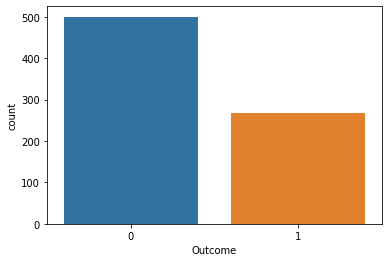

In [6]:
sns.countplot(df['Outcome']);

In [7]:
df.describe().T # verisetinin istatiksel bilgileri

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Model Kurulumu ve Tahminleme

In [8]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu,
rf = RandomForestClassifier().fit(X_train, y_train)
rf

RandomForestClassifier()

In [9]:
# tahminleme
y_pred = rf.predict(X_test)
skor = accuracy_score(y_test, y_pred) 
skor # dogruluk skoru

0.7402597402597403

In [11]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



### Model Tuning

In [12]:
?rf

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        ~/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the 

In [13]:
# optimum parametrelerin elde edilmesi
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_cv = GridSearchCV(rf,
                     rf_params,
                     cv = 10, 
                     n_jobs = -1).fit(X_train, y_train)
                     
rf_cv # 4-5 dk. sürebilir!

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]})

In [14]:
rf_cv.best_params_ # optimum parametre degerleri

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [15]:
# optimum parametreler ile model kurulumu,
rf_model = RandomForestClassifier(max_depth = 10,
                                  max_features = 2,
                                  min_samples_split = 5,
                                  n_estimators = 1000).fit(X_train, y_train)
rf_model

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=5,
                       n_estimators=1000)

In [16]:
# tahminleme,
y_pred = rf_model.predict(X_test)
dogSkor = accuracy_score(y_test, y_pred)
dogSkor # optimum dogruluk skoru

0.7337662337662337

In [18]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



#### Değişkenlerin Önem Düzeyleri

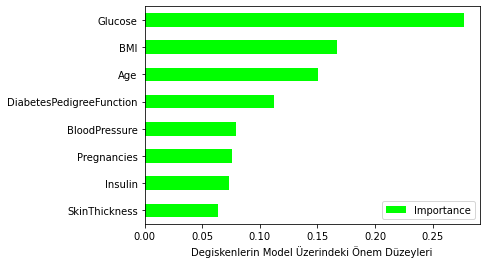

In [21]:
Importance = pd.DataFrame({'Importance': rf_model.feature_importances_},
                            index = X_train.columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'lime')

plt.xlabel('Degiskenlerin Model Üzerindeki Önem Düzeyleri');

## SONUÇ

Bu projede, belirli değerler göz önünde bulundurularak bir kişinin hasta olup olmadığını tahmin etmek için Rastgele Ağaçlar Sınıflandırıcı modeli kullanıldı.
* Modelin optimum dogruluk skoru: **0.7337662337662337**